In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from PIL import Image, ImageOps
from sklearn import preprocessing as prep

from module.conf import PROJECT_DIR

# matplotlib.use("QTCairo")

## 1. Read Image

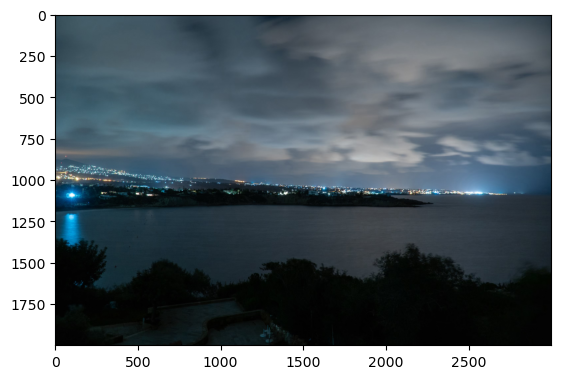

In [2]:
with Image.open(fp=PROJECT_DIR + "/data/img/Cyprus.jpg") as img:
    mImg = np.asarray(img)
    fig, axes = plt.subplots()
    axes.imshow(mImg)
    plt.show()

## 2. Write Image

result: True


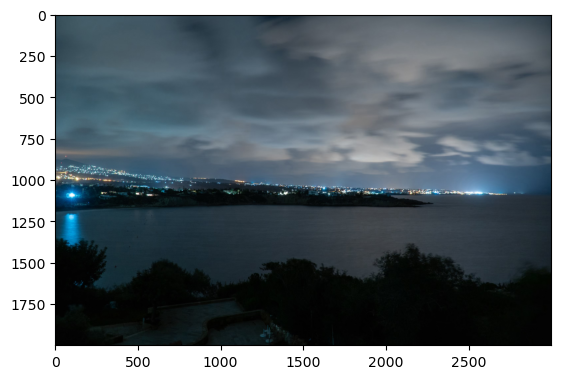

In [3]:
min = np.min(mImg)
max = np.max(mImg)
mImgRescaled = (mImg - min)/(max - min)
mImgRestored = np.dot(mImgRescaled, 255).astype(np.uint8)

modImg: Image.Image = Image.fromarray(mImgRestored)

print(f"result: {np.array_equal(mImg, mImgRestored)}")

# modImg.save(fp=PROJECT_DIR + "/data/img/Cyprus_1.jpg")

fig, axes = plt.subplots()
axes.imshow(modImg)
plt.show()

## 3. Process Image

### 3.1 Gray scale

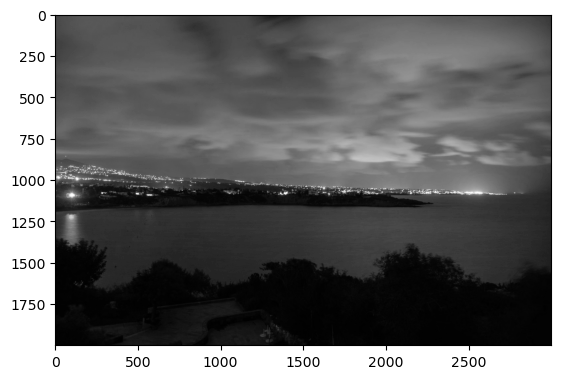

In [5]:
# modImg = ImageOps.grayscale(img)
# mImgGrayScale1 = np.asarray(modImg)
mImgGrayScale = np.zeros(mImg.shape)
R = mImg[:, :, 0]
G = mImg[:, :, 1]
B = mImg[:, :, 2]
mImgGrayScale = (R * .25 + G * .625 + B*.125).astype(np.uint8)
# print(f"{mImgGrayScale}\n{mImgGrayScale1}")
modImg: Image.Image = Image.fromarray(obj=mImgGrayScale, mode="L")

fig, axes = plt.subplots()
axes.imshow(modImg, cmap="gray")
plt.show()

## 4. Steganography

### 4.1 N-Rightmost Bit / Least Significant Bit (LSB):

### 4.2 Hamming Code